# Exercise 1: House price levels and dispersion

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder.

    To familiarize yourself with the data, report the columns present in the DataFrame and 
    then restrict the data to the columns `SalePrice` and `Neighborhood`.
    
    Check that there are no observations with missing values in the final data set.

2.  Compute the average house price (column `SalePrice`) by neighborhood (column `Neighborhood`). List the three most expensive neighborhoods, for example by using [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

    Create a bar chart showing the average sale price for all neighborhoods in descending order.

    *Hint:* You can create the bar chart by either using pandas's 
    [`DataFrame.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
    or Matplotlib's
    [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

3.  You want to quantify the price dispersion in each neighborhood. To this end, compute the standard deviation by neighborhood using [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html). Which are the three neighborhoods with the most dispersed prices?

    Create a scatter plot with the average house price on the $x$-axes and the standard deviation on the $y$-axis.
    Is there a relationship between the average house prices and their dispersion within neighborhood?

    *Hint:* You can create the scatter plot by either using pandas's 
    [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
    or Matplotlib's 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

In [ ]:
import pandas as pd
DATA_PATH = '../../data'
fn = f'{DATA_PATH}/ames_houses.csv'
df = pd.read_csv(fn)
df

In [ ]:
df_subset = df[['SalePrice','Neighborhood']]
missing_counts = df_subset.isnull().sum()
print(missing_counts)
#df_subset = df_subset.dropna()
print(df_subset)

In [ ]:
data = df_subset.groupby('Neighborhood')['SalePrice'].mean()


In [ ]:
top3 = data.sort_values(ascending = False).head()
plt.bar(top3.index,top3.values)
plt.xlim(1,3)

In [ ]:
import matplotlib.pyplot as plt
plt.bar(data.index,data.values)
_ = plt.xticks(rotation=90)
plt.xlabel('Name of Neighborhoods')
plt.ylabel('Average Price of Houses')
plt.title('Ames Housing')

In [ ]:
data1 = df_subset.groupby('Neighborhood')['SalePrice'].std()

In [ ]:
plt.scatter(data1.index,data1.values)
__ = plt.xticks(rotation=90)


***
# Exercise 2: Determinants of house prices

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa,
to understand how house prices vary with selected house characteristics.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder, and keep only the
    columns `SalePrice`, `LotArea`, `YearBuilt`, and `Bedrooms`.

    Restrict your data set to houses with one or more bedrooms and a lot area of at least 100m².

2.  Compute the average year in which a house was built (using the column `YearBuilt`). Create a new column `New` which takes on the value of 1 if the house was built after the average year of construction (_"new"_), and 0 otherwise (_"old"_). 

    What is the average year of construction within these two categories?

3.  Create a new column `Rooms` which categorizes the number of `Bedrooms` into three groups: 1, 2, and 3 or more. You can create these categories using boolean indexing, [`np.where()`](https://numpy.org/doc/2.0/reference/generated/numpy.where.html), pandas's [`where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html), or some other way.

4.  Compute the mean `SalePrice` within each group formed by `New` and `Rooms` (for a total of 6 different categories) using [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

    What is the average price difference between an old house with 1 bedroom and a new house with 3+ bedrooms?

5.  Create a figure with two subplots arranged in two columns. The left column should contain a bar chart showing
    the average house price by number of bed rooms (1, 2, 3+) for _old_ houses, whereas the 
    right column should show the corresponding bars for _new_ houses.

In [1]:
import pandas as pd
DATA_PATH = '../../data'
fn = f'{DATA_PATH}/ames_houses.csv'
df = pd.read_csv(fn)

In [2]:
df_subset2 = df[['SalePrice', 'LotArea', 'YearBuilt', 'Bedrooms']]
df_filtered = df_subset2[(df_subset2['Bedrooms'] >= 1) & (df_subset2['LotArea'] >= 100000)]

In [3]:
avg_yr = int(df['YearBuilt'].mean())
df['New'] = (df['YearBuilt'] == avg_yr).astype(int)

avg_yr_construction = df.groupby('New')['YearBuilt'].mean()
print(avg_yr_construction)


New
0    1971.361121
1    1971.000000
Name: YearBuilt, dtype: float64


In [57]:
import numpy as np
df['Rooms'] = sorted(df['Bedrooms'].where(df['Bedrooms'] >= 3))
grouped = df.groupby(["New","Rooms"])["SalePrice"].mean().reset_index()
grouped = grouped.dropna()
print(grouped)

   New  Rooms   SalePrice
0    0    3.0  187.236543
1    0    4.0  180.990909
2    0    5.0  140.702083
3    0    6.0  183.761905
4    0    8.0   96.500000
5    1    3.0  141.272414
6    1    4.0  144.975000


Text(0.5, 0, 'Number of Bedrooms')

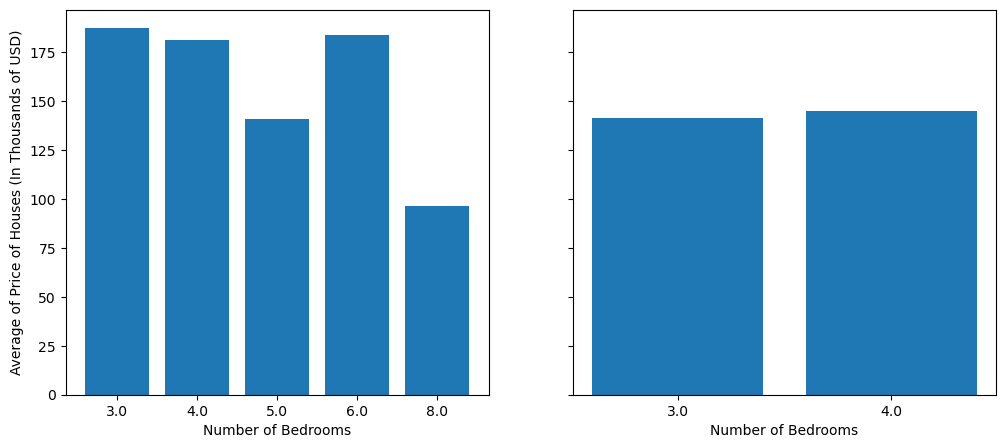

In [75]:
old1 = grouped[grouped["New"] == 0]
new1 = grouped[grouped["New"] == 1]

fig, axes = plt.subplots(1,2, sharey=True, figsize = (12,5))

axes[0].bar(old1['Rooms'].astype(str),old1['SalePrice'])
axes[0].set_ylabel('Average of Price of Houses (In Thousands of USD)')
axes[0].set_xlabel('Number of Bedrooms')
axes[1].bar(new1['Rooms'].astype(str),new1['SalePrice'])
axes[1].set_xlabel('Number of Bedrooms')


In [69]:
df['Rooms'] = np.where(df['Bedrooms'] == 1, 1,
             np.where(df['Bedrooms'] == 2, 2,
             np.where(df['Bedrooms'] >= 3, 3, np.nan)))
group = df.groupby(["New","Rooms"])["SalePrice"].mean().reset_index()
print(group)

   New  Rooms   SalePrice
0    0    1.0  183.016964
1    0    2.0  162.610109
2    0    3.0  187.827464
3    1    2.0  132.754545
4    1    3.0  143.442857


In [70]:
old = group[group['New'] == 0]
new = group[group['New'] == 1]

Text(0.5, 0, 'Number of Bedrooms')

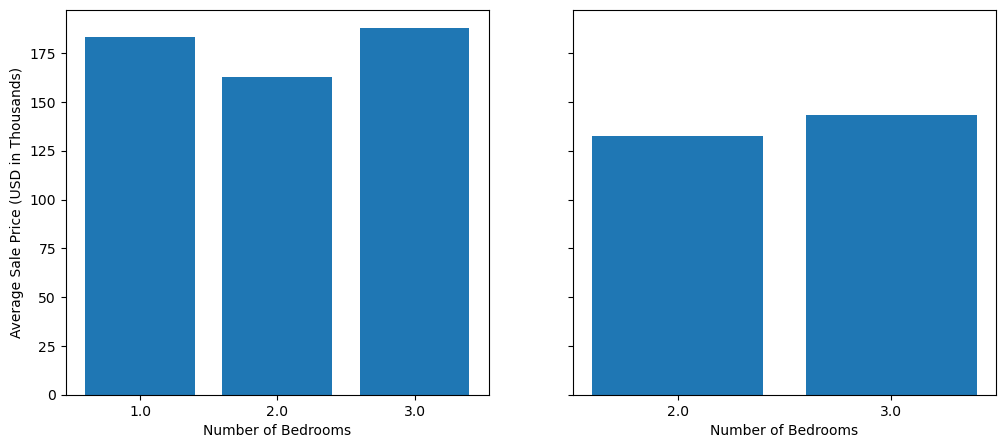

In [76]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, sharey= True, figsize=(12,5))
#fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

axes[0].bar(old['Rooms'].astype(str),old['SalePrice'])
axes[0].set_xlabel("Number of Bedrooms")
axes[0].set_ylabel("Average Sale Price (USD in Thousands)")

axes[1].bar(new['Rooms'].astype(str),new['SalePrice'])
axes[1].set_xlabel('Number of Bedrooms')

***
# Exercise 3: Inflation and unemployment in the US

In this exercise, you'll be working with selected macroeconomic variables for the United States reported at monthly frequency obtained from [FRED](https://fred.stlouisfed.org/).
The data set starts in 1948 and contains observations for a total of 864 months.

1.  Load the data from the file `FRED_monthly.csv` located in the `data/FRED` folder. Print the first 10 observations to get an idea how the data looks like.
    
    Keep only the columns `Year`, `Month`, `CPI`, and `UNRATE`. Moreover, perform this analysis only on observations prior to 1970 and drop the rest.

2.  The column `CPI` stores the consumer price index for the US. You may be more familiar with the concept of inflation, which is the percent change of the CPI relative to the previous period. 
    Create a new column `Inflation` which contains the _annual_ inflation _in percent_ relative to the same month in the previous year by applying 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) to the column `CPI`.

    *Hints:* 
    
    -   Since this is monthly data, you need to pass the arguments `periods=12` to `pct_change()` to get annual percent changes.
    -   You need to multiply the values returned by `pct_change()` by 100 to get percent values.

3.  Compute the average unemployment rate (column `UNRATE`) over the whole sample period. Create a new column `UNRATE_HIGH` that contains an indicator whenever the unemployment rate is above its average value (_"high unemployment period"_). 
    -   How many observations fall into the high- and the low-unemployment periods?
    -   What is the average unemployment rate in the high- and low-unemployment periods?

4.  Compute the average inflation rate for high- and low-unemployment periods. Is there any difference?

5.  Use [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) to aggregate
    the inflation data to annual frequency and compute the average inflation within each calendar year.

    -   Report the three years with the highest inflation rates.
    -   Create a plot that shows the average annual inflation over the sample period.

    *Hint:* Use the resampling rule `'YE'` when calling `resample()`.


In [ ]:
fn = f'{DATA_PATH}/FRED/FRED_monthly.csv'
US = pd.read_csv(fn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      924 non-null    object 
 1   Year      924 non-null    int64  
 2   Month     924 non-null    int64  
 3   CPI       924 non-null    float64
 4   UNRATE    924 non-null    float64
 5   FEDFUNDS  846 non-null    float64
 6   REALRATE  516 non-null    float64
 7   LFPART    924 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 57.9+ KB


In [100]:
US_subset = US[['Year','Month','CPI','UNRATE']]
US_subset = US_subset[US_subset['Year'] < 1970]

In [109]:
US_subset['Inflation'] = US_subset['CPI'].pct_change(periods=12) * 100

#US_subset['Inflation'] = US_subset['Inflation'].dropna()

US_subset['Inflation']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
259    5.428571
260    5.698006
261    5.665722
262    5.932203
263    5.898876
Name: Inflation, Length: 264, dtype: float64

In [ ]:
US_UNRATE_AVG = US_subset['UNRATE'].mean()
US_subset['UNRATE_HIGH'] = (US_subset['UNRATE'] > US_UNRATE_AVG).astype(int)
US_subset['UNRATE_LOW'] = (US_subset['UNRATE'] <= US_UNRATE_AVG).astype(int)

High_Inflation_Rate = US_subset['UNRATE_HIGH'].sum()
Low_Inflation_Rate = US_subset['UNRATE_LOW'].sum()

High_AVG = US_subset.loc[US_subset['UNRATE_HIGH'] == 1, 'UNRATE'].mean()
Low_AVG = US_subset.loc[US_subset['UNRATE_LOW'] == 1, 'UNRATE'].mean()


In [ ]:
High_Inflation_AVG = US_subset.loc[US_subset['UNRATE_HIGH'] == 1, 'Inflation'].mean()
Low_Inflation_AVG = US_subset.loc[US_subset['UNRATE_LOW'] == 1, 'Inflation'].mean()


In [135]:
US_subset['Date'] = pd.to_datetime(US_subset[['Year','Month']].assign(DAY=1))
US_subset.set_index('Date', inplace=True)
US_subset

,Year,Month,CPI,UNRATE,Inflation,UNRATE_HIGH,UNRATE_LOW
Date,,,,,,,
1948-01-01,1948,1,23.7,3.4,NaN,0,1
1948-02-01,1948,2,23.7,3.8,NaN,0,1
1948-03-01,1948,3,23.5,4.0,NaN,0,1
1948-04-01,1948,4,23.8,3.9,NaN,0,1
1948-05-01,1948,5,24.0,3.5,NaN,0,1
...,...,...,...,...,...,...,...
1969-08-01,1969,8,36.9,3.5,5.428571,0,1
1969-09-01,1969,9,37.1,3.7,5.698006,0,1
1969-10-01,1969,10,37.3,3.7,5.665722,0,1


In [ ]:
Annual_Inflation = US_subset['Inflation'].resample('YE').mean().dropna()

top_3 = Annual_Inflation.sort_values(ascending=False).head(3)


Text(0.5, 0, 'Years')

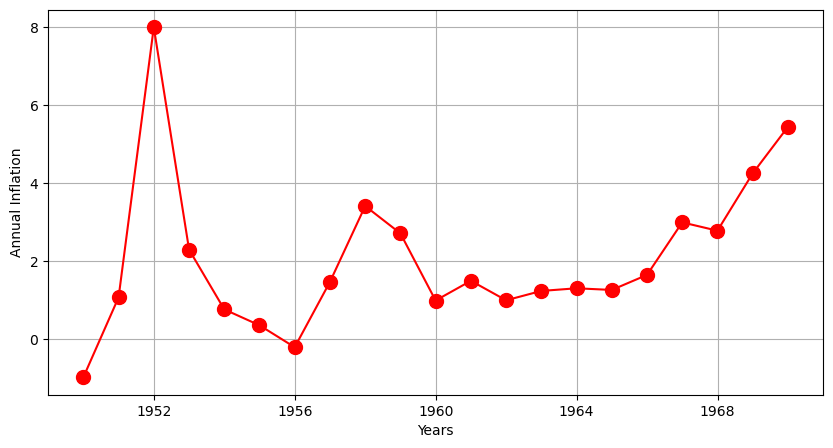

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(Annual_Inflation.index,Annual_Inflation.values, marker='o',markersize ='10', color = 'Red')
plt.grid()
plt.ylabel('Annual Inflation')
plt.xlabel('Years')


In [ ]:
Inflation